# Cluster Analysis

The following tutorial contains Python examples for solving clustering problems. You should refer to Chapters 7 and 8 of the "Introduction to Data Mining" book, and slides week 8 to understand some of the concepts introduced in this tutorial.

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package. 

聚类分析旨在将输入数据划分为密切相关的实例组，以便属于同一聚类的实例彼此之间更相似，而不是属于其他聚类的实例。在本教程中，我们将提供使用 scikit-learn 库包提供的不同聚类技术的示例。

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## 1 K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

k 均值聚类分析算法按其对应的聚类质心表示每个聚类。该算法将通过迭代应用以下两个步骤将输入数据划分为 *k* 不相交的聚类：
1. 通过将每个实例分配给其最近的质心来形成 *k* 聚类。 
2. 重新计算每个聚类的质心。

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows. 在本节中，我们将对电影评级数据集的玩具示例执行 k 均值聚类。我们首先创建数据集，如下所示。

In [2]:
import pandas as pd

# 创建一个二维列表，其中包含用户名称和电影评分
# 每个子列表的第一个元素是用户的名称，接下来是电影评分
# 在此示例中，共有6个用户和4个电影
ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]

# 创建一个字符串列表，其中包含电影的名称
titles = ['user','Jaws','Star Wars','Exorcist','Omen']

# 使用 pandas 的 DataFrame 函数将 ratings 转换为 pandas DataFrame
# 指定列的名称为 titles 中的字符串
# 这个对象类似于一个表格，每行代表一个用户，每列代表一部电影或用户名。这个DataFrame对象被赋值给了变量movies
movies = pd.DataFrame(ratings,columns=titles)
# 使用Pandas的DataFrame函数将ratings和titles转换为一个DataFrame对象。

movies  # 打印出变量movies，这个DataFrame对象会以表格的形式呈现出来

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [3]:
from sklearn import cluster #从sklearn中导入cluster模块，其中包含了各种聚类算法的实现

data = movies.drop('user',axis=1)
# 使用drop()方法从movies数据框中删除名为'user'的列，创建一个名为data的新数据框。新数据框中只包含电影评分数据，将用作聚类的输入数据。
# drop是Pandas库中的一个函数，用于删除DataFrame或Series中的行或列。
# 可以通过指定行或列的标签名称或标签号来删除它们，也可以通过指定axis参数来指定是删除行还是列。默认情况下，axis参数的值为0，即删除行。


k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
# 创建一个名为k_means的KMeans聚类对象，指定了三个参数：n_clusters=2表示要创建的聚类数目，max_iter=50表示最大迭代次数，random_state=1表示设置随机种子以便可重现
# 随机种子是一个随机数发生器的初始值，用于确定随机数的序列。通过指定随机种子，可以确保随机数的序列是确定的，因此在使用相同的随机种子运行相同的算法时，可以得到相同的结果，从而保证了算法的可重现性


k_means.fit(data) 
# 使用fit()方法将KMeans模型拟合到输入数据data上。


labels = k_means.labels_
# 提取KMeans模型为每个数据点分配的聚类标签。
# 聚类标签指的是将样本划分到不同聚类簇的标签，一般用数字来表示。这段代码使用KMeans算法将样本划分到了两个聚类簇，即聚类0和聚类1，所以聚类标签只有0和1


pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])
# pd.DataFrame()函数将labels数组转换为新的数据框，其中行索引使用movies数据框中的用户姓名，列名称为'Cluster ID'用于存储分配的聚类标签。

# 这段代码使用pd.DataFrame函数将聚类标签和对应的用户名称组成的数据框输出，用于进一步的分析和可视化。具体来说，该函数接受三个参数：
# labels：聚类算法为每个数据点分配的聚类标签，是一个一维数组。
# index：数据框的行索引，指定为movies.user，即原始数据中的用户名称。
# columns：数据框的列名，指定为['Cluster ID']，即聚类标签。
# 因此，该函数的作用是将聚类标签和对应的用户名称组成一个数据框，行表示用户，列表示聚类标签，便于对不同聚类的用户进行比较和分析

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


pd.DataFrame() 是 pandas 库中用于创建数据框对象的函数。它的语法格式如下：

pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

data: 用于指定要传入数据框中的数据。可以是各种数据类型，包括 DataFrame, numpy 数组、字典、Series、其它可迭代序列等等。如果不指定该参数，则可以在创建空数据框之后再添加数据；

index: 数据框的行标签，可以是一个列表、数组、Series 或者指定名称的索引；

columns: 数据框的列标签，可以是一个列表、数组、Series 或者指定名称的索引；

dtype: 数据的类型；

copy: 如果为 True，则复制数据，否则只是视图。

The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [4]:
centroids = k_means.cluster_centers_  # 返回了每个聚类簇的中心点坐标。
# k_means是一个KMeans聚类对象，通过调用其cluster_centers_属性可以获取聚类中心。聚类中心是每个聚类的平均值，即所有数据点在该聚类中各个特征的平均值
# 将聚类中心保存在centroids变量中，centroids是一个二维数组，其行数等于聚类的数目，列数等于每个数据点的特征数目

pd.DataFrame(centroids,columns=data.columns)  # 每一行代表一个聚类簇的中心点，每一列代表一个数据集特征的平均值

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments.

观察到聚类 0 对恐怖电影的评级较高，而群集 1 对动作电影的评级较高。可以将聚类质心应用于其他用户以确定其聚类分配。

这段代码主要是对测试数据集 testData 进行聚类分析，采用的是 K-means 聚类算法 (k_means 模型)。

首先使用该模型对 testData 进行聚类预测，并将每个样本的聚类标签存储在新的数组 labels 中。

然后，将 labels 数组重新调整为二维数组，并创建一个包含五个用户名称的新数组 usernames，这些用户名称对应于 testData 中的五行。

接下来，代码使用 tolist() 方法将一个已有 DataFrame movies 的列名转换为列表，并将字符串 'Cluster ID' 添加到该列表中，生成一个新的列名列表 cols。然后，使用 NumPy 库的 concatenate() 函数将 usernames、testData 和 labels 组合成一个新数组，并将其转换为 Pandas DataFrame，使用 cols 列表中的列名作为 DataFrame 的列名。最后，将新 DataFrame 作为输出返回。

In [5]:
import numpy as np

# 创建一个包含五行四列的 NumPy 数组 testData，表示五个用户对四部电影的评分情况
testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])

# # 使用 k_means 模型对测试数据集 testData 进行聚类预测。
# k_means.predict() 方法返回测试数据集中每个样本所属的聚类标签，这些聚类标签会被赋值给变量 labels
labels = k_means.predict(testData) 

# 使用 NumPy 库中的 reshape() 方法，将 labels 数组从一维数组转换为二维数组，以便后续能够将其添加到DataFrame对象中
labels = labels.reshape(-1,1) 

# 创建一个包含五个用户名称的 NumPy 数组 usernames，这些用户名称对应于 testData 中的五行
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)

# 使用 Pandas DataFrame movies 的 columns 属性获取其所有列名，并用 tolist() 方法将列名转换为一个列表对象 cols
cols = movies.columns.tolist()

# 将字符串 'Cluster ID' 添加到列表 cols 的末尾，使得 cols 列表中包含了所有需要分析的列名
cols.append('Cluster ID')

# 使用 NumPy 库中的 concatenate() 函数将 usernames、testData 和 labels 沿着水平方向合并为一个新的数组，
# 并将其转换为 Pandas DataFrame，使用 cols 列表中的列名作为 DataFrame 的列名
# 将新的 DataFrame 存储在变量 newusers 中
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
# concatenate() 函数，用于将三个数组按照水平方向（即 axis=1）合并成一个新的数组

newusers

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


## 2 Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

本节演示将分层聚类应用于模块 6（分类）中使用的脊椎动物数据集的示例。具体来说，我们说明了使用Python scipy库提供的3种分层聚类算法的结果：（1）单链路（MIN），（2）完整链路（MAX）和（3）组平均值。该库提供的其他分层聚类算法包括基于质心的聚类算法和 Ward 方法。

In [6]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
# 设置为'infer'，Pandas会尝试自动检测列名所在的行数，即自动推断CSV文件的列名

data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


### 2.1 Single Link (MIN)

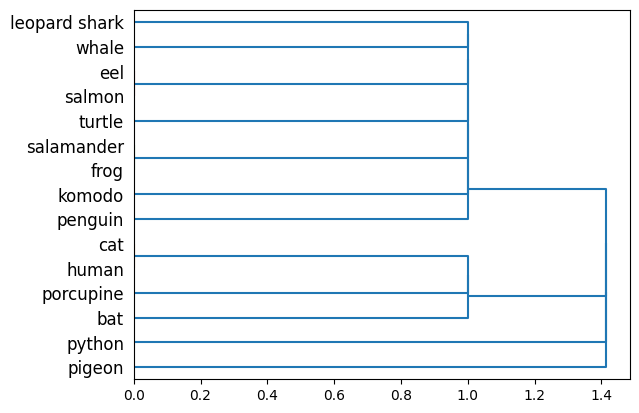

In [7]:
# 使用了SciPy库的聚类模块来创建数据的层次聚类的树状图可视化
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

# 这三行代码分别将数据集中的样本名称、类别标签和特征值分别存储在names、Y和X变量中。
# 其中，drop函数可以从数据集中删除指定的列，这里的代码将Name和Class两列从数据集中删除，保留剩余的列作为特征值
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

# 使用hierarchy.linkage函数对特征值X进行层次聚类，并将聚类结果存储在Z变量中。'single'参数指定了使用最近邻链接准则
Z = hierarchy.linkage(X.values, 'single')

# 使用hierarchy.dendrogram函数绘制聚类的树状图，并将样本名称作为标签，设置orientation='right'参数使得树状图在右侧显示
# Z参数是层次聚类的结果，即代表树状结构的嵌套列表。labels参数用来指定每个样本的名称，tolist()方法将names变量转换为列表
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 2.2 Complete Link (MAX)

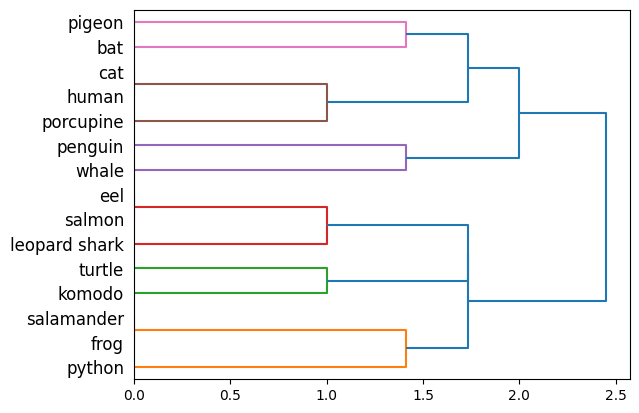

In [8]:
# 使用'complete'参数指定使用最远邻链接准则进行聚类
# 最远邻链接会优先将距离最远的数据点合并到一起，因此聚类结果会比最近邻链接更加松散，分得更少。

Z = hierarchy.linkage(X.values, 'complete') #complete: Max
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
# 在绘制树状图时，orientation='right'参数仍然用来将树状图显示在右侧

In [9]:
names

0             human
1            python
2            salmon
3             whale
4              frog
5            komodo
6               bat
7            pigeon
8               cat
9     leopard shark
10           turtle
11          penguin
12        porcupine
13              eel
14       salamander
Name: Name, dtype: object

### 2.3 Group Average

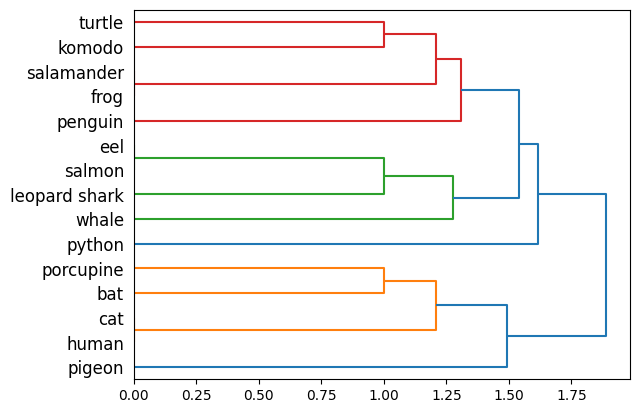

In [10]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
#如果在1.75cut，那会得到两个class

## 3 Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples). 

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

基于密度的聚类将各个聚类标识为由低密度区域分隔的高密度区域。DBScan 是最流行的基于密度的聚类算法之一。在DBScan中，数据点根据其本地邻域的密度分为3种类型---核心点，边界点和噪声点---。局部邻域密度根据 2 个参数定义：邻域大小半径 （eps） 和邻域中的最小点数 （min_samples）。

对于这种方法，我们将使用最初由Karypis等人[1]创建的噪声二维数据集来评估他们提出的变色龙算法。下面显示的示例代码将加载并绘制数据的分布。

<Axes: xlabel='x', ylabel='y'>

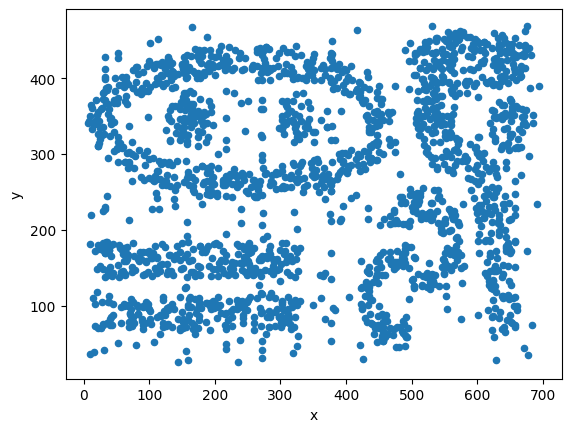

In [11]:
import pandas as pd

# 首先导入了Pandas库，然后使用pd.read_csv函数从文件'chameleon.data'中读取数据
# 使用空格作为分隔符，将其存储在变量data中。names=['x','y']指定了两列的列名为'x'和'y'
# delimiter=' '参数指定数据文件中的分隔符是空格，因为该数据文件中的数据是由空格分隔的
data = pd.read_csv('chameleon.data', delimiter=' ', names=['x','y'])

# 使用data.plot.scatter函数将数据绘制成散点图。其中，x='x'和y='y'参数分别指定了在散点图中使用数据框架中的'x'和'y'列作为x轴和y轴。
# 这个函数会自动创建一个matplotlib子图，并在其中绘制散点图。
data.plot.scatter(x='x',y='y')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

我们将邻域半径 （eps） 设置为 15.5，将最小点数 （min_samples） 设置为 5，从而对数据应用 DBScan 聚类算法。将聚类分配给介于 0 到 8 之间的 ID，而将噪声点分配给等于 -1 的聚类 ID。

<Axes: xlabel='x', ylabel='y'>

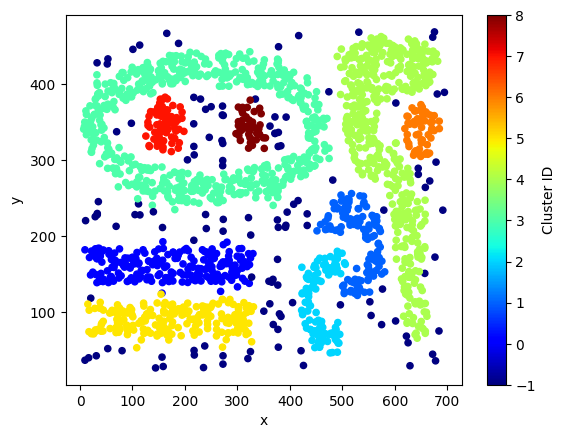

In [12]:
from sklearn.cluster import DBSCAN  # 导入Scikit-learn库中的DBSCAN类

# eps=15.5和min_samples=5是DBSCAN算法的两个超参数，分别表示邻域半径和最小样本数。这里使用默认的欧氏距离度量来计算数据点之间的距离
# .fit(data) 表示将数据集 data 输入到算法中进行聚类
db = DBSCAN(eps=15.5, min_samples=5).fit(data)

# 这行代码的功能是使用np.zeros_like() 函数创建一个和db.labels_ 数组大小相同，元素全为False的布尔类型的Numpy数组，用于标记哪些数据点是核心点或噪声点
# np 表示 numpy 模块，需要先导入该模块。
# zeros_like() 是 numpy 中的一个函数，用于创建一个和给定数组 db.labels_ 大小相同的全零数组。
# 这里 db.labels_ 是一个聚类算法的输出，表示每个数据点属于哪个簇。dtype=bool 表示数组元素的数据类型是布尔类型。
# 最后，将这个数组赋值给变量 core_samples_mask，该变量用于标记哪些数据点是核心点（True）或噪声点（False）
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# 通过db.core_sample_indices_获取所有核心点的索引，并将这些索引对应的core_samples_mask中的值设置为True，表示这些点是核心点
core_samples_mask[db.core_sample_indices_] = True

# 将聚类结果 db.labels_ 转换成一个 Pandas 数据框，其中每个数据点被标记为一个簇的 ID 号，列名为 Cluster ID
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])

# 将数据集 data 和聚类结果 labels 按列方向（axis=1）合并成一个新的数据集 result，
# 该数据集包含了原始数据集中的所有特征和每个数据点所属的簇 ID 号
result = pd.concat((data,labels), axis=1)
# 将原始数据data和聚类标签labels在列方向上拼接成一个新的数据框result

# c 表示每个数据点的颜色，这里用聚类结果 Cluster ID 表示。colormap='jet' 表示使用颜色映射将不同簇的数据点标记为不同的颜色。
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

## 4 Spectral Clustering

One of the main limitations of the k-means clustering algorithm is its tendency to seek for globular-shaped clusters. Thus, it does not work when applied to datasets with arbitrary-shaped clusters or when the cluster centroids overlapped with one another. Spectral clustering can overcome this limitation by exploiting properties of the similarity graph to overcome such limitations. To illustrate this, consider the following two-dimensional datasets.

k均值聚类算法的主要局限性之一是它倾向于寻找球形聚类。因此，当应用于具有任意形状聚类的数据集或聚类质心彼此重叠时，它不起作用。光谱聚类可以通过利用相似性图的属性来克服这种限制。为了说明这一点，请考虑以下二维数据集。

<Axes: xlabel='x', ylabel='y'>

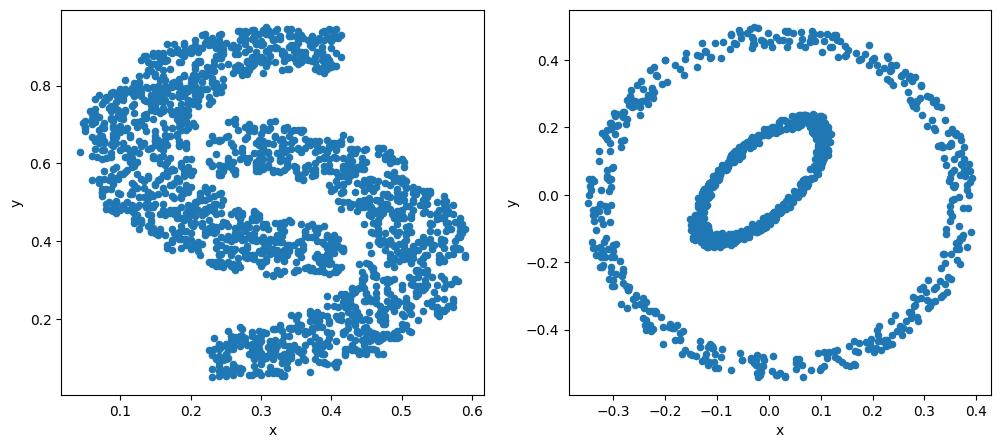

In [13]:
import pandas as pd

data1 = pd.read_csv('2d_data.txt', delimiter=' ', names=['x','y'])
# '2d_data.txt' 的文本文件读入到一个 pandas 数据框对象 data1 中，
# 使用 delimiter=' ' 参数指定文件中的分隔符为空格，使用 names=['x', 'y'] 参数指定数据框中的两列分别为 x 和 y

data2 = pd.read_csv('elliptical.txt', delimiter=' ', names=['x','y'])
# 将名为 'elliptical.txt' 的文本文件读入到一个 pandas 数据框对象 data2 中，
# 使用 names=['x', 'y'] 参数指定数据框中的两列分别为 x 和 y。

# 创建一个 Matplotlib 图形对象，其中包含两个子图。子图 ax1 和 ax2 按水平方向排列，图形大小为 (12,5)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# 如果设置nrows=2和ncols=1，那么两个子图垂直地叠放在一起。

# 在子图 ax1 中绘制 data1 中的数据。
# 使用 plot.scatter 方法绘制散点图，x 和 y 分别表示数据框中的两列数据，ax=ax1 表示将散点图绘制在子图 ax1 中
data1.plot.scatter(x='x',y='y',ax=ax1)

data2.plot.scatter(x='x',y='y',ax=ax2)

Below, we demonstrate the results of applying k-means to the datasets (with k=2).

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering')

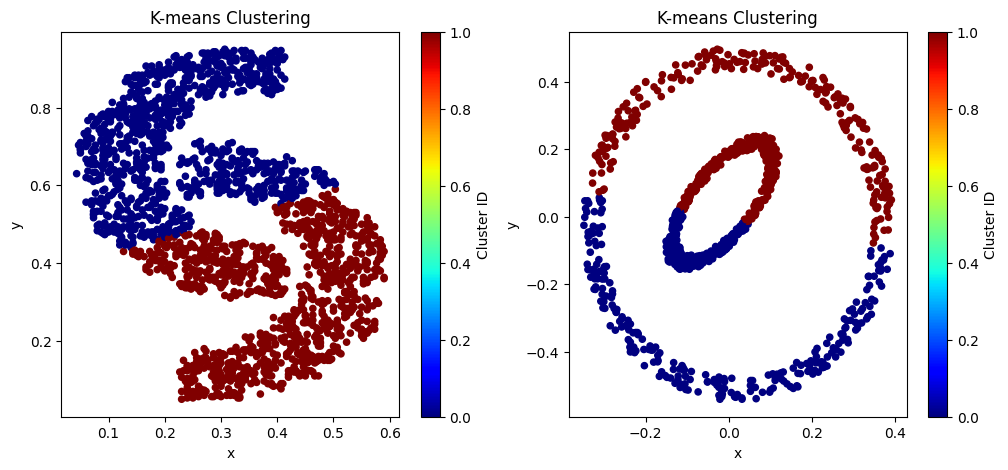

In [14]:
from sklearn import cluster
# 从sklearn库中导入了cluster模块

# 通过创建两个KMeans对象，对名为data1和data2的两个数据集进行聚类。
# n_clusters设置为2表示要聚类成2类，max_iter设置为50表示最多迭代50次
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)

# 使用fit()方法将data1数据集传递给KMeans对象进行聚类
k_means.fit(data1)

# 将聚类结果存储在labels1变量中，使用pd.DataFrame()创建一个DataFrame来保存聚类结果，其中'Cluster ID'是聚类后每个数据点所属的簇的标识符
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])

# 使用concat()方法合并聚类结果与原始数据集data1合并，并将结果存储在result1变量中，axis=1表示沿着列方向进行拼接
result1 = pd.concat((data1,labels1), axis=1)

# 使用KMeans对象k_means2对数据集data2进行聚类，将聚类结果存储在labels2变量中，
# 并使用pd.concat()方法将聚类结果与原始数据集data2合并，将结果存储在result2变量中
k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

# 使用plt.subplots()函数创建一个包含两个子图的图形，将其分配给变量fig和(ax1,ax2)元组
# 其中，nrows=1表示有1行，ncols=2表示有2列，figsize=(12,5)表示图形的大小为12英寸×5英寸
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# c='Cluster ID'表示使用Cluster ID列中的值作为颜色数据，colormap='jet'表示使用颜色映射jet进行着色
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

# "jet"是一种用于制作二维图像颜色的颜色表，它包含了从深蓝到亮红的渐变色调
# 在散点图中，可以使用jet颜色表为每个聚类分配不同的颜色，以使每个聚类在图中显示出不同的颜色。

The plots above show the poor performance of k-means clustering. Next, we apply spectral clustering to the datasets. Spectral clustering converts the data into a similarity graph and applies the normalized cut graph partitioning algorithm to generate the clusters. In the example below, we use the Gaussian radial basis function as our affinity (similarity) measure. Users need to tune the kernel parameter (gamma) value in order to obtain the appropriate clusters for the given dataset. 

上图显示了 k 均值聚类的性能不佳。接下来，我们将光谱聚类应用于数据集。光谱聚类将数据转换为相似性图，并应用归一化切割图分区算法来生成聚类。在下面的示例中，我们使用高斯径向基函数作为亲和力（相似性）度量。用户需要调整核参数 （gamma） 值，以便为给定数据集获取适当的聚类。

Text(0.5, 1.0, 'Spectral Clustering')

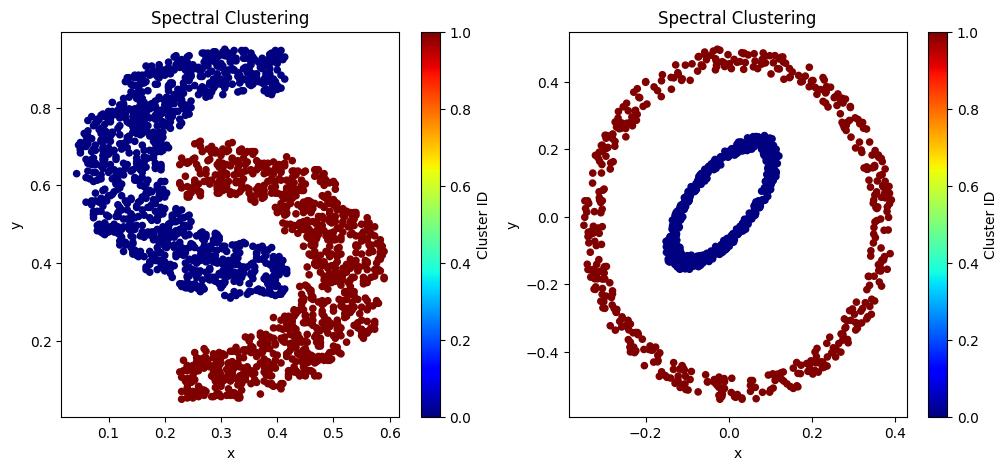

In [15]:
from sklearn import cluster #Library
import pandas as pd

# 创建一个SpectralClustering对象，将其赋值给spectral变量
# n_clusters参数指定要聚类的簇数
# affinity参数指定用于计算相似度矩阵的方法（RBF（Radial Basis Function）内核，即高斯内核）
# gamma参数指定rbf内核的参数，用于用于控制相似度矩阵中每个点对应的高斯函数的波动范围，即高斯函数的标准差
spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=5000)

# 使用fit()方法将数据集data1传递给spectral对象进行聚类
spectral.fit(data1)

# spectral.labels_ 是通过 fit() 方法聚类后得到的标签数组，其中每个元素代表一个数据点的簇标签
# 在聚类分析中，通过对数据点进行相似性度量和聚类算法处理，将数据点划分到不同的簇中
# 每个簇都有一个标识符，数据点属于哪个簇，就将该簇的标识符分配给该数据点作为其簇标签

# 创建了一个 DataFrame 对象，其中包含一列数据，这一列数据的名称为 "Cluster ID"，数据来源于 spectral.labels_
# spectral.labels_ 是 SpectralClustering 类的一个属性，用于存储数据点的簇标签
# labels1 DataFrame 中的每个数据点都是数据集中的一个观测值，对应的簇标签存储在 "Cluster ID" 列中
labels1 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])

# 将 data1 和 labels1 按列方向组合在一起，形成一个新的 DataFrame，赋值给 result1 变量
# data1 是原始的数据集，而 labels1 是通过 spectral 模型进行聚类得到的数据点的簇标签
result1 = pd.concat((data1,labels1), axis=1)

# 就是在原始数据集的最右加一列cluster ID，告诉我们这行数据属于哪个cluster

spectral2 = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=500)
spectral2.fit(data2)
labels2 = pd.DataFrame(spectral2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

# 使用subplots()函数创建一个包含两个子图的图形，并将其分配给变量fig和(ax1,ax2)元组
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# c参数用于指定聚类标签的颜色，colormap参数指定用于指定颜色映射的预定义colormap
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)

# 使用set_title()方法为第一个子图设置标题
ax1.set_title('Spectral Clustering')

# 第一个子图显示了data1数据集的聚类结果，第二个子图显示了data2数据集的聚类结果
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')

## 5 Summary

This tutorial illustrates examples of using different Python's implementation of clustering algorithms. Algorithms such as k-means, spectral clustering, and DBScan are designed to create disjoint partitions of the data whereas the single-link, complete-link, and group average algorithms are designed to generate a hierarchy of cluster partitions.

本教程说明了使用不同 Python 的聚类分析算法实现的示例。k-means、频谱聚类和 DBScan 等算法旨在创建数据的不相交分区，而单链路、完整链路和组平均算法旨在生成集群分区的层次结构。

References:
[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.

# Week 8 assignment - Due in Week 9

## Use the Iris dataset to separate the 150 data points into three clusters. (please note you should not use the "class" attribute in your feature set).
### 1. Use KMeans to do the clustering, use 'petal width', 'sepal width' to do the scatter plot and use cluster label as color.
### 2. Use Complete Link to do the clustering, use 'petal width', 'sepal width' to do the scatter plot and use cluster label as color.
### 3. Choose one density-based clustering algorithm and present the clustering results.
### 4. Discuss the clustering mechanisms and results using the method in Q1, 2, and 3.
### 5. Review and compare different clustering algorithms and choose another clustering algorithm for the 'elliptical.txt' dataset. Reference link: [Clustering Algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

# 1. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans

In [17]:
iris = pd.read_csv('iris.txt',header=None)
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']

In [18]:
X = iris.drop(['class'], axis=1)
X = X[['petal-W', 'sepal-W']].values

In [19]:
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans_model.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


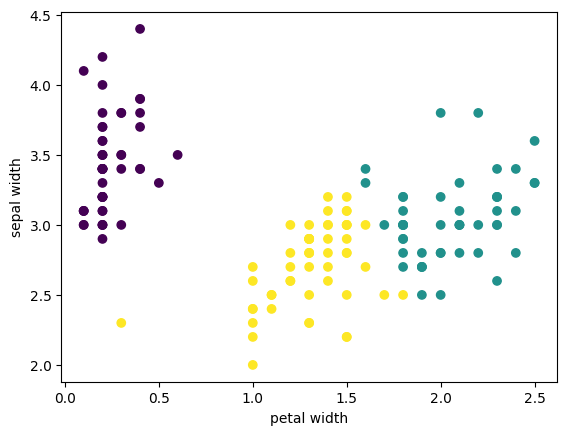

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.xlabel('petal width')
plt.ylabel('sepal width')
plt.show()

# 2.

In [21]:
from scipy.cluster import hierarchy
%matplotlib inline

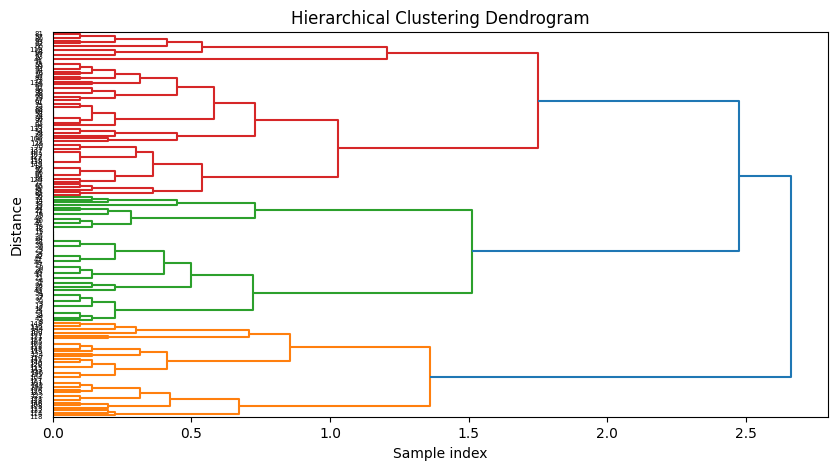

In [41]:
Z = hierarchy.linkage(X, 'complete')

# 写的是下面这个，但我也不知道为什么愚蠢至此写成了这个
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dn = hierarchy.dendrogram(Z,orientation='right')

# 3.

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [25]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X)

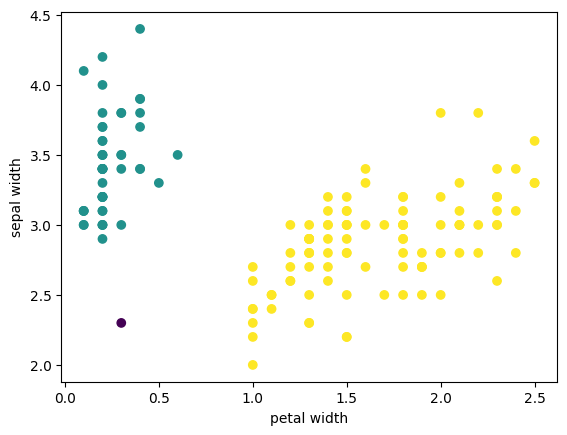

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.xlabel('petal width')
plt.ylabel('sepal width')
plt.show()

# 4.

KMeans is a distance-based clustering method that divides data points into K clusters, where each cluster contains the closest data point to the centre. the results of KMeans are susceptible to initialisation and the number of clusters needs to be specified in advance. In Q1, the KMeans results show that the three categories of the Iris dataset are well separated, and it can be seen that petal width and sepal width are important features to distinguish the three categories.

Complete Link is a hierarchical clustering based method that divides data points into a series of increasingly larger clusters until all data points are in one cluster. complete link uses the distance between the furthest data points in two clusters as the distance between the two clusters. In Q2, the results of Complete Link show that the three categories of the Iris dataset are better separated.

DBSCAN is a density-based clustering method that classifies data points into clusters by finding high-density regions and treating low-density regions as noise.DBSCAN does not require a pre-specified number of clusters and is able to identify clusters of arbitrary shape. In Q3, the DBSCAN results show that the three classes of the Iris dataset are well separated, and it can be seen that DBSCAN is able to identify smaller clusters and noisy points.

All three clustering methods are able to cluster the Iris dataset effectively; KMeans and Complete Link are distance-based methods that require a pre-specified number of clusters and are more effective in clustering, while DBSCAN is a density-based method that does not require a pre-specified number of clusters, but requires adjustment of parameters and is more effective in clustering datasets with sparse density distributions. In practice, a suitable clustering method needs to be chosen according to the characteristics of the data and the purpose of the clustering.


KMeans 是一种基于距离的聚类方法，它将数据点划分为 K 个簇，其中每个簇包含离中心最近的数据点。 KMeans 的结果容易受到初始化的影响，需要提前指定集群的数量。在Q1中，KMeans结果显示鸢尾花数据集的三类分离良好，可以看出花瓣宽度和萼片宽度是区分三类的重要特征。 

Complete Link 是一种基于层次聚类的方法，它将数据点划分为一系列越来越大的簇，直到所有数据点都在一个簇中。 complete link 使用两个簇中最远的数据点之间的距离作为两个簇之间的距离。在Q2，Complete Link的结果表明Iris数据集的三类分离效果更好。 

DBSCAN 是一种基于密度的聚类方法，通过寻找高密度区域并将低密度区域视为噪声来将数据点分类为簇。DBSCAN 不需要预先指定的簇数，并且能够识别任意形状的簇。在 Q3 中，DBSCAN 结果表明 Iris 数据集的三类分离良好，可以看出 DBSCAN 能够识别更小的聚类和噪声点。

三种聚类方法都能够有效地对 Iris 数据集进行聚类。KMeans和Complete Link是基于距离的方法，需要预先指定的簇数，聚类效果更好，而DBSCAN是基于密度的方法，不需要预先指定的簇数，但需要调整参数并且在对具有稀疏密度分布的数据集进行聚类时更有效。在实践中，需要根据数据的特点和聚类目的选择合适的聚类方法。

# 5.

In [27]:
from sklearn.cluster import Birch

In [28]:
data = pd.read_csv('elliptical.txt', delimiter=' ', names=['x','y'])

In [29]:
birch = Birch(n_clusters=2)
birch.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (2). Decrease the threshold.
  warnings.warn(


Birch(n_clusters=2)

In [30]:
labels = pd.DataFrame(birch.labels_, columns=['Cluster ID'])

# Combine raw data and cluster labels into a single data frame
result = pd.concat((data, labels), axis=1)

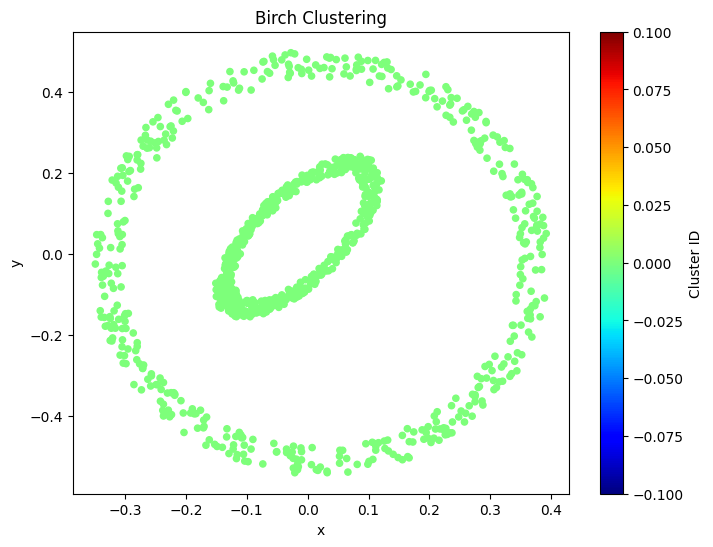

In [31]:
result.plot.scatter(x='x', y='y', c='Cluster ID', colormap='jet', figsize=(8, 6))
plt.title('Birch Clustering')
plt.show()

# Revision:

# 1.

In [32]:
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.txt', header = None, names=['sepal-L','sepal-W','petal-L','petal-W','class'])
data = iris.drop('class',axis=1)

X = iris[['sepal-W','petal-W']].values

k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data)
labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)

print(result)

     sepal-L  sepal-W  petal-L  petal-W  Cluster ID
0        5.1      3.5      1.4      0.2           1
1        4.9      3.0      1.4      0.2           1
2        4.7      3.2      1.3      0.2           1
3        4.6      3.1      1.5      0.2           1
4        5.0      3.6      1.4      0.2           1
..       ...      ...      ...      ...         ...
145      6.7      3.0      5.2      2.3           2
146      6.3      2.5      5.0      1.9           0
147      6.5      3.0      5.2      2.0           2
148      6.2      3.4      5.4      2.3           2
149      5.9      3.0      5.1      1.8           0

[150 rows x 5 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='petal-W', ylabel='sepal-W'>

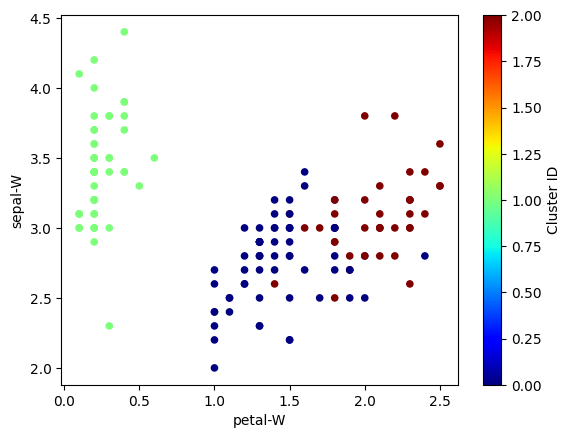

In [33]:
result.plot.scatter(x='petal-W',y='sepal-W',c='Cluster ID',colormap='jet')

# 2. 

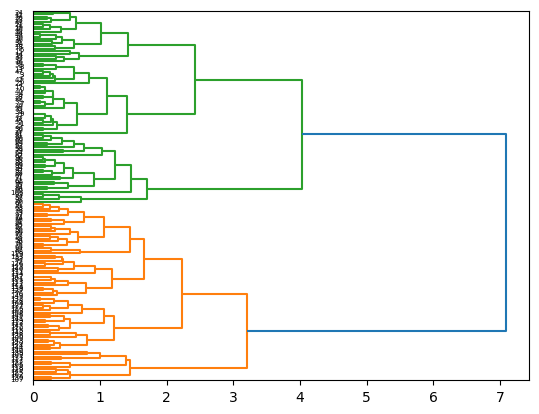

In [34]:
Z = hierarchy.linkage(data.values, 'complete')
dn = hierarchy.dendrogram(Z,orientation='right')

In [35]:
from sklearn.cluster import AgglomerativeClustering

<Axes: xlabel='petal-W', ylabel='sepal-W'>

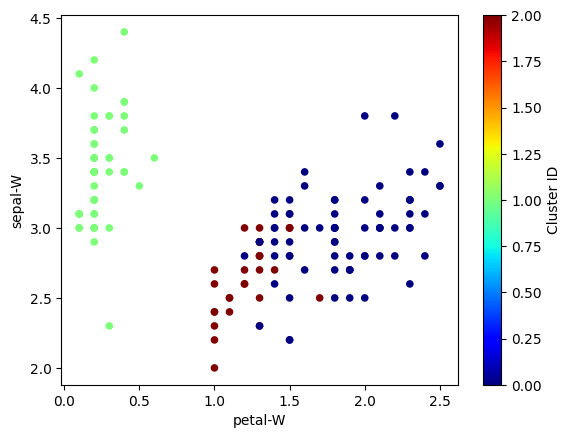

In [36]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
cluster.fit(data)

labels = pd.DataFrame(cluster.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)

result.plot.scatter(x='petal-W',y='sepal-W',c='Cluster ID',colormap='jet')

# 3.

[ 0 -1  1]


<Axes: xlabel='petal-W', ylabel='sepal-W'>

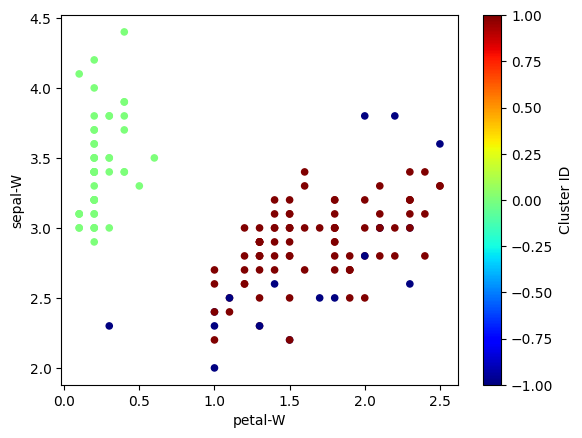

In [37]:
db = DBSCAN(eps=0.5, min_samples=5).fit(data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)

print(result['Cluster ID'].unique())

result.plot.scatter(x='petal-W',y='sepal-W',c='Cluster ID', colormap='jet')

# 4 和 5 都看上面那个